In [2]:
%pylab inline
import pickle as pkl

Populating the interactive namespace from numpy and matplotlib


In [1]:
cd ../TileEM/

/home/jlee782/crowd-seg/analysis/TileEM


In [37]:
tiles = pkl.load(open("uniqueTiles/10workers_rand0/vtiles1.pkl"))
mask = pkl.load(open("pixel_em/10workers_rand0/obj1/MV_mask.pkl"))

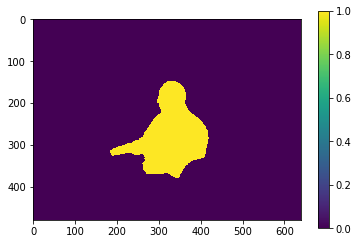

In [33]:
plt.imshow(mask)
plt.colorbar()

In [12]:
area_mask = np.zeros_like(mask)
tile=tiles[0]
x,y = tile.exterior.xy

In [ ]:
from PIL import Image, ImageDraw
obj_x_locs = [process_raw_locs([x,y])[0] for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]
obj_y_locs = [process_raw_locs([x,y])[1] for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]
for x_locs, y_locs in zip(obj_x_locs,obj_y_locs):
    img = Image.new('L', (width, height), 0)
    ImageDraw.Draw(img).polygon(zip(x_locs,y_locs), outline=1, fill=1)
    mask = np.array(img)==1
    mega_mask+=mask

In [92]:
from PIL import Image, ImageDraw
x,y = tile.exterior.xy
img = Image.new('L', (shape(mask)[0], shape(mask)[1]), 0)
ImageDraw.Draw(img).polygon(zip(x,y), outline=2, fill=2)
mask = np.array(img)#==1
# mega_mask+=mask

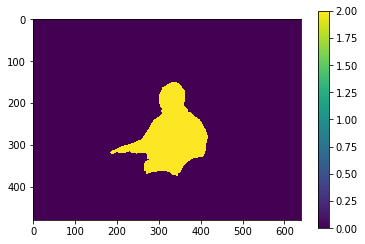

In [93]:
plt.imshow(mask)
plt.colorbar()

In [127]:
from PIL import Image, ImageDraw
tiles = pkl.load(open("uniqueTiles/10workers_rand0/vtiles1.pkl"))
MV = pkl.load(open("pixel_em/10workers_rand0/obj1/MV_mask.pkl"))
mega_mask= np.zeros_like(MV)
t_area = np.array([t.area for t in tiles])
# sorted by largest to smallest area 
#so that small area assignments for a pixel overrides the large area assignments
ordered_tiles = np.array(tiles)[np.argsort(t_area)[::-1]]
for tile in ordered_tiles:
    x,y = tile.exterior.xy
    tarea = tile.area
    img = Image.new('L', ( shape(MV)[1],shape(MV)[0]), 0)
    ImageDraw.Draw(img).polygon(zip(x,y), outline=1, fill=1)
    mask = np.array(img)*tarea
#     plt.figure()
#     plt.imshow(mask)
#     plt.colorbar()
    mega_mask+=mask

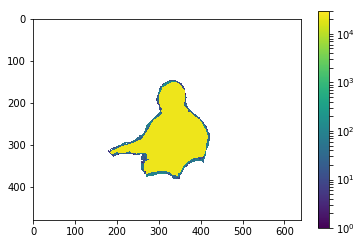

In [133]:
from matplotlib.colors import LogNorm
plt.imshow(mega_mask, norm=LogNorm(vmin=1, vmax=3e4))
plt.colorbar()

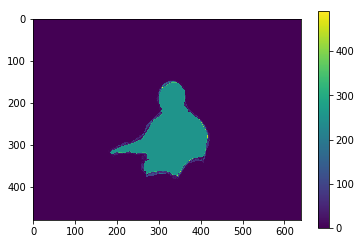

In [115]:
plt.imshow(mega_mask)
plt.colorbar()

In [ ]:
import pickle as pkl

In [142]:
from PIL import Image, ImageDraw
sample = '10workers_rand0'
def tarea_mask(sample, objid):
    tiles = pkl.load(open("uniqueTiles/{}/vtiles{}.pkl".format(sample,objid)))
    MV = pkl.load(open("pixel_em/{}/obj{}/MV_mask.pkl".format(sample,objid)))
    mega_mask= np.zeros_like(MV)
    t_area = np.array([t.area for t in tiles])
    # sorted by largest to smallest area 
    #so that small area assignments for a pixel overrides the large area assignments
    ordered_tiles = np.array(tiles)[np.argsort(t_area)[::-1]]
    for tile in ordered_tiles:
        x,y = tile.exterior.xy
        tarea = tile.area
        img = Image.new('L', ( shape(MV)[1],shape(MV)[0]), 0)
        ImageDraw.Draw(img).polygon(zip(x,y), outline=1, fill=1)
        mask = np.array(img)*tarea
        mega_mask+=mask
    pkl.dump(mega_mask,open("pixel_em/{}/obj{}/tarea_mask.pkl".format(sample,objid),'w'))

In [143]:
from sample_worker_seeds import sample_specs

In [145]:
from tqdm import tqdm

In [ ]:
for sample in tqdm(sample_specs.keys()):
    for objid in range(1,48):
        tarea_mask(sample,objid)

 32%|███▏      | 10/31 [11:19<23:46,  0.01it/s] 